# Non-negative Matrix Factorization (NMF) 

### Dataset

The dataset is the famous Breast Cancer Wisconsin dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). It contains features computed from digitized images of a fine needle aspirate (FNA) of a breast mass; each feature described some characteristic of the cell nuclei present in the image. For the 'diagnosis' column, 1=malignant; 0=benign.

### Dependencies
This code was developed and tested in R 3.6.0. [IRkernel](https://irkernel.github.io/installation/) was used to run R on Jupyter notebook. The [NMF package](https://cran.r-project.org/web/packages/NMF/index.html) is a key dependency.

In [2]:
bc_wisc = read.csv("bc_wisc.csv")
head(bc_wisc)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
919537,0,10.960,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,⋯,11.62,26.51,76.43,407.5,0.1428,0.25100,0.21230,0.09861,0.2289,0.08278
883539,0,12.420,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,⋯,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783
88147102,0,15.000,15.51,97.45,684.5,0.08371,0.10960,0.065050,0.037800,⋯,16.41,19.31,114.20,808.2,0.1136,0.36270,0.34020,0.13790,0.2954,0.08362
863031,0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,⋯,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097
862261,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,⋯,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
908469,0,14.860,16.94,94.89,673.7,0.08924,0.07074,0.033460,0.028770,⋯,16.31,20.54,102.30,777.5,0.1218,0.15500,0.12200,0.07971,0.2525,0.06827


In [3]:
n = nrow(bc_wisc)
m = ncol(bc_wisc)
print(paste('Number of rows/patients =',n))
print(paste('Number of columns/features =',m))

[1] "Number of rows/patients = 560"
[1] "Number of columns/features = 32"


In [5]:
library('NMF')

In [20]:
k = 2
nmf_bc <- nmf(bc_wisc[,3:m], k, 'lee', seed=1, .options=list(track=TRUE))

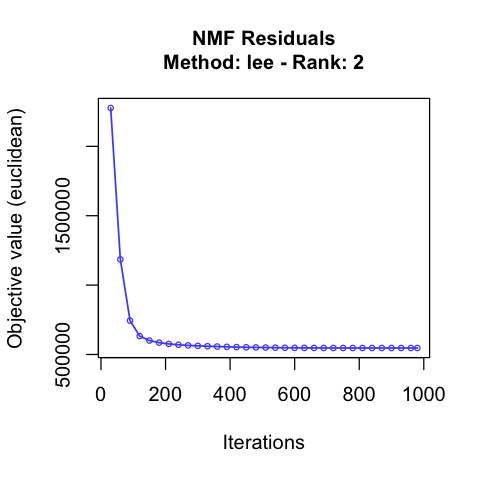

In [21]:
library('repr')
options(repr.plot.width=4, repr.plot.height=4)
plot(nmf_bc)

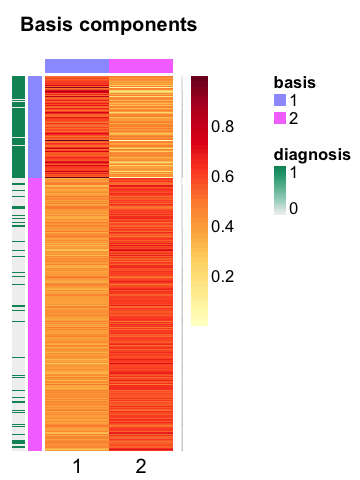

In [22]:
W = basis(nmf_bc)
hardcluster_W = apply(W, 1, which.max)

options(repr.plot.width=3, repr.plot.height=4) #comment out if not in Jupyter notebook
basismap(nmf_bc, Rowv=c(order(hardcluster_W)), annRow=bc_wisc['diagnosis'])

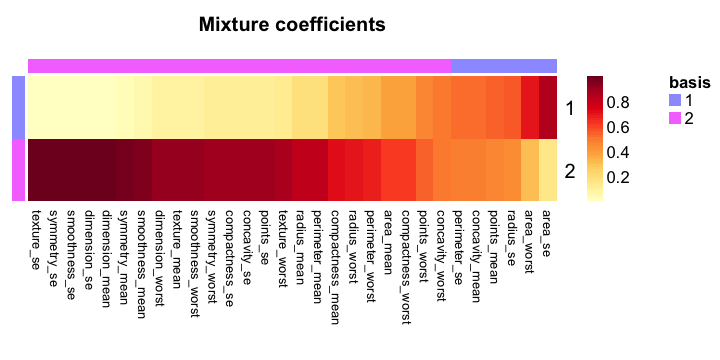

In [23]:
H = coef(nmf_bc)
softcluster = t(H)/colSums(H)
options(repr.plot.width=6, repr.plot.height=3)
coefmap(nmf_bc, Colv=c(order(softcluster[,1])))